Data Analysis using Pandas


In [39]:
#import tools we will need
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#sns has an annoying warning when you use the plots so we can turn that off 
import warnings
warnings.filterwarnings('ignore')

In [40]:
#what does the data look like?
train=pd.read_csv('train.csv') 
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
#stats for each column
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
#Check for missing values 
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
#We can see here that cabin has a lot of missing values. We will remove that from the data set,we will have to figure out what to do with age and embarked a bit later.

In [44]:
#Removing columns we do not need
#passenger id is not relevent to us, cabin is too many missing values and ticket has too many formats and even if we split the string it will likely not give us enough value for the effort
#Note, we could analyze names and titles, however this is most likely linked to pclass/fare and a waste of time
remove=['PassengerId','Name','Cabin','Ticket']
df_train=train.drop(remove,axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [45]:
#dealing with the age variable 
#if we use the mean of the whole data set we will get a large amount of values at the same spot(29.6 pulled from our data above in .describe)
#this would put 177 values of 29.6 and would skew the data a lot
df_train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [46]:
#the highest correlation for age is pclass at ~ 0.369 which is not great but it is the best we have to work with without deleting the columns with null values

In [47]:
#let's check if there is a difference in genders and pclass age to see if we can use a second group-by 

In [48]:
fixage= df_train.groupby(['Pclass']).median()['Age']

for pclass in range(1,4):
        print('Median age of Pclass {}: {}'.format(pclass,fixage[pclass]))

Median age of Pclass 1: 37.0
Median age of Pclass 2: 29.0
Median age of Pclass 3: 24.0


In [49]:
fixage= df_train.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1,4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, fixage[sex][pclass]))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0


In [50]:
#as we can see here, there is a discrepency in the age according to gender so it will increase our accuracy if we combine sex in our replacements for the null values which will smooth our data out. 

In [51]:
for df in [df_train]:
    df['Age'].fillna(df.groupby(['Pclass','Sex'])['Age'].transform('mean'), inplace=True)

In [52]:
#re-check if the values are fixed 
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [53]:
#What do we do for embarked?
#there are only 2 values missing here, we could try and look for probabilities of embark based on other attributes but the risk for error is too high
#in this situation I am choosing to drop the 2 data points to have the least effect on the overall data 

df_train.dropna(subset=['Embarked'], inplace=True)


In [54]:
#Recheck missing data 
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

<H1> Looking at Variables individually<H1>

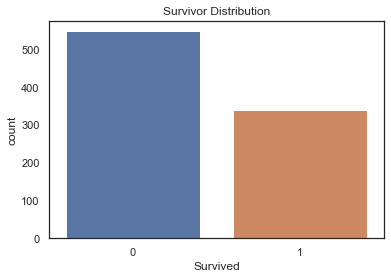

In [55]:
sns.countplot(df_train.Survived).set(title='Survivor Distribution')
plt.show()

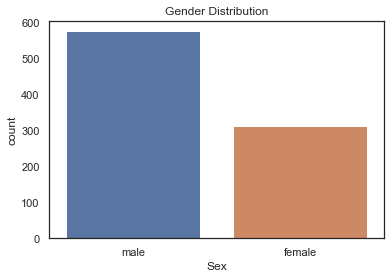

In [56]:
sns.countplot(df_train.Sex).set(title='Gender Distribution')
plt.show()

In [57]:
#From this chart, we can see more total men compared to women were on the ship

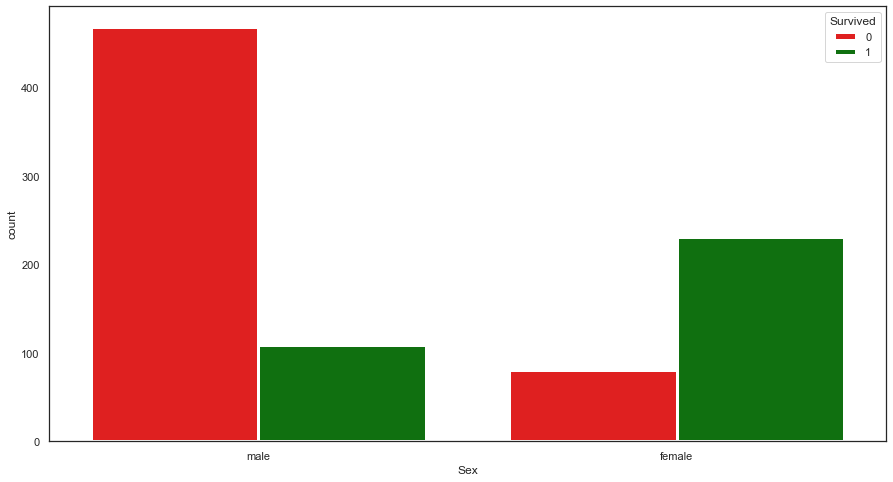

In [58]:
pal = {1:"green", 0:"red"}
sns.set(style="white")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Sex",hue="Survived",data = df_train, linewidth=3,palette = pal)

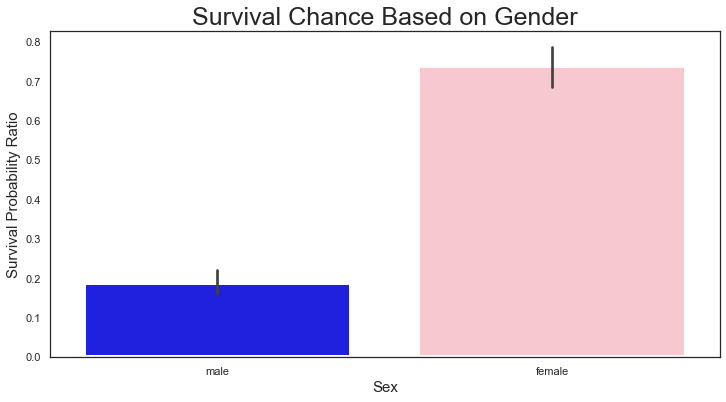

In [59]:
gender={'male':"Blue", 'female':"Pink"}
sns.set(style="white")
plt.subplots(figsize = (12,6))
ax =sns.barplot(x = "Sex",y = ("Survived"),data=df_train,palette = gender,linewidth=4)
plt.title("Survival Chance Based on Gender",fontsize=25)
plt.ylabel("Survival Probability Ratio", fontsize = 15)
plt.xlabel("Sex",fontsize = 15)
plt.show()

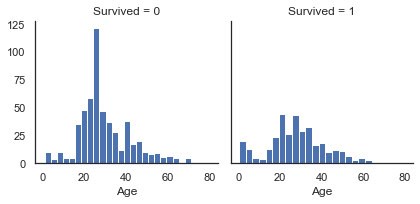

In [60]:
#age 
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=25)
plt.show()

In [61]:
#However, when we compare the gender with survivorship, we can see that women had a better probability of surviving than men

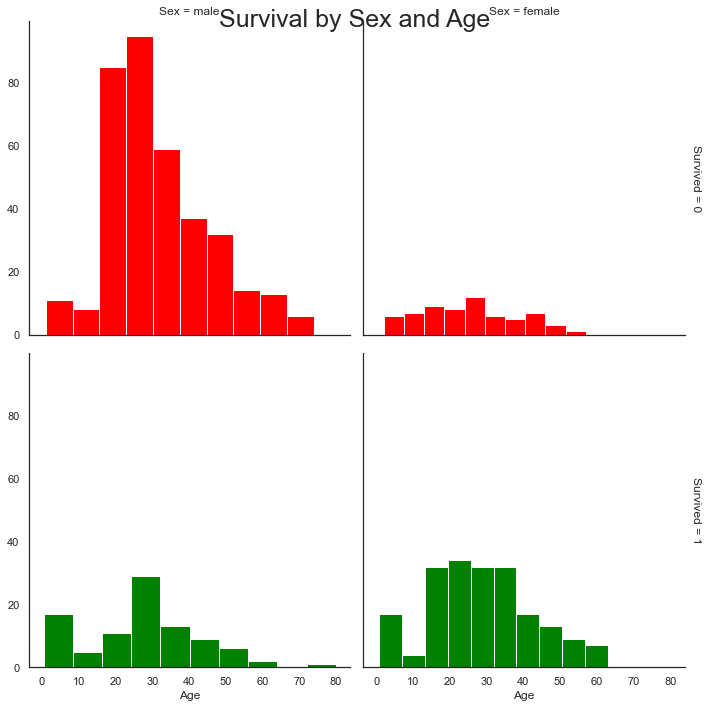

In [62]:
pal = {1:"green", 0:"red"}
g = sns.FacetGrid(train,size=5, col="Sex", row="Survived", margin_titles=True, hue = "Survived",
                  palette=pal)
g = g.map(plt.hist, "Age");
g.fig.suptitle("Survival by Sex and Age", size = 25)
plt.show()

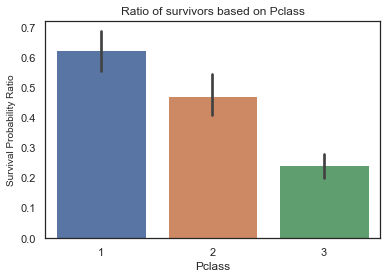

In [63]:
sns.barplot(x='Pclass', y='Survived', data=df_train)
plt.title('Ratio of survivors based on Pclass')
plt.ylabel("Survival Probability Ratio", fontsize = 10)
plt.show()

In [64]:
#we can see that the 3rd Pclass has the lowest chance of survival 

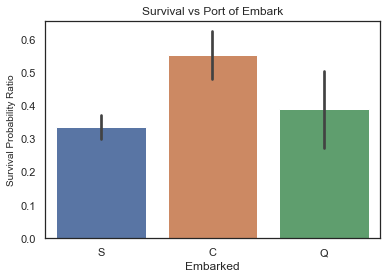

In [65]:
sns.barplot(x='Embarked', y='Survived', data=df_train)
plt.title('Survival vs Port of Embark')
plt.ylabel("Survival Probability Ratio", fontsize = 10)
plt.show()

In [66]:
#people from the port Cherborg had the highest rate of survival 

In [67]:
#replace parch and sibsp for Family 
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [68]:
sum_column=df_train["SibSp"]+df_train["Parch"]
df_train["Family"]=sum_column

In [69]:
alone=['SibSp','Parch']
df_train=df_train.drop(alone,axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Family
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


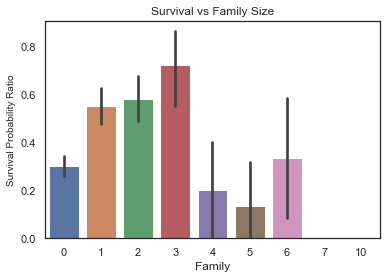

In [70]:
sns.barplot(x='Family', y='Survived', data=df_train)
plt.title('Survival vs Family Size')
plt.ylabel("Survival Probability Ratio", fontsize = 10)
plt.show()

In [71]:
#People with 3 members had the greatest rate of survival. 
#People with 4/5 family members had the lowest rate of survival, followed by people who are alone and then people with 6 members

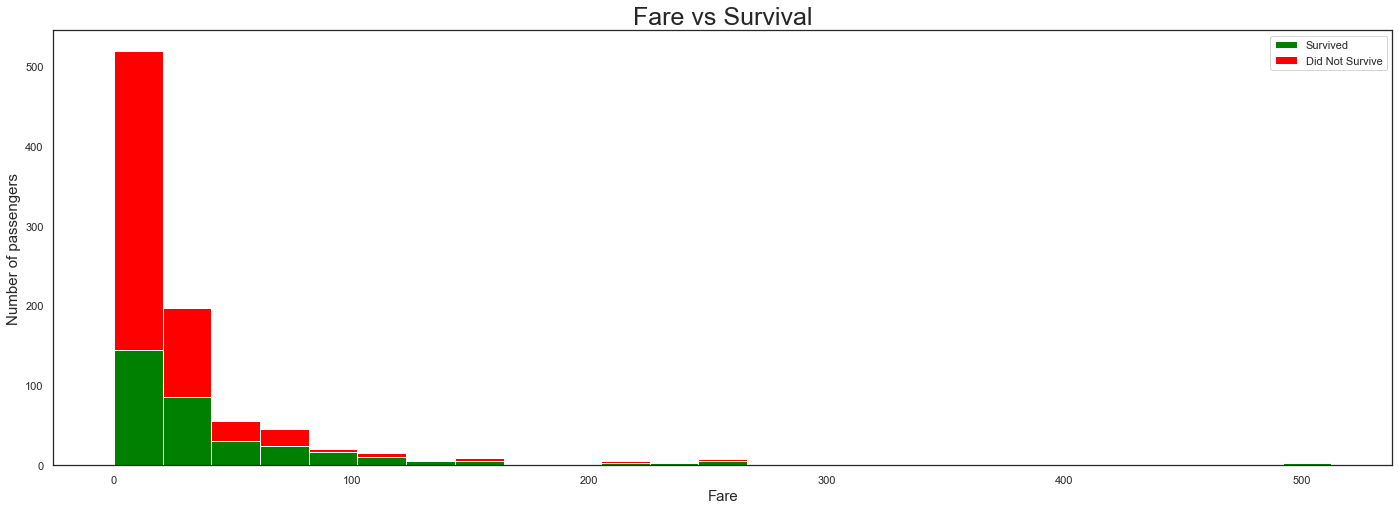

In [72]:
#Fare
plt.figure(figsize=(24,8))
plt.hist([df_train[df_train['Survived']==1]['Fare'],df_train[df_train['Survived'] == 0]['Fare']], 
        stacked=True, color = ['green','red'],
        bins = 25, label = ['Survived','Did Not Survive'])
plt.title('Fare vs Survival', fontsize=25)
plt.xlabel('Fare',fontsize=15)
plt.ylabel('Number of passengers',fontsize=15)
plt.legend();

In [73]:
#with an increase in ticket price(fare), the person was more more likely to survive. People paying over 100 have a noticable chance to survived compared to those paying less than 100. 

In [74]:
df_train.corr()

,Survived,Pclass,Age,Fare,Family
Survived,1.000000,-0.335549,-0.072321,0.255290,0.018277
Pclass,-0.335549,1.000000,-0.404114,-0.548193,0.064221
Age,-0.072321,-0.404114,1.000000,0.115477,-0.261121
Fare,0.255290,-0.548193,0.115477,1.000000,0.218658
Family,0.018277,0.064221,-0.261121,0.218658,1.000000


<h1> Summary

Women(70%) had a greater rate of survival compared to men (20%).    

Women who were between the ages of 15 and 40 had the highest rate of survival.

People embarking from Cherborg had the highest rate of survival.

People pclass of one 

People with a fare>100 had noticeably better rate of survival.

People with 3 family members on board were most likely to survive. 

The highest correlations relative to survivability were Pclass(-0.336), and Fare (0.256).
